In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)



In [2]:
Train_raw = pd.read_csv('../input/tabular-playground-series-dec-2021/train.csv')

In [3]:
Test_raw = pd.read_csv('../input/tabular-playground-series-dec-2021/test.csv')

In [4]:
pd.set_option('max_columns', 56) 

In [5]:
Train_raw.shape

(4000000, 56)

This much rows means we can have a small dev set and a larger train set. So 99-1 split should suffice as we would get to have larger train data and a better fit

In [6]:
Train_raw['Cover_Type'].unique()

array([1, 2, 3, 6, 7, 4, 5])

In [7]:
#Checking if the data contains any nulls
Train_raw.isnull().sum()

Id                                    0
Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0


In [8]:
Train_raw.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,0,3189,40,8,30,13,3270,206,234,193,4873,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,1,3026,182,5,280,29,3270,233,240,106,5423,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2
2,2,3106,13,7,351,37,2914,208,234,137,5269,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
3,3,3022,276,13,192,16,3034,207,238,156,2866,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2
4,4,2906,186,13,266,22,2916,231,231,154,2642,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2


<AxesSubplot:ylabel='Frequency'>

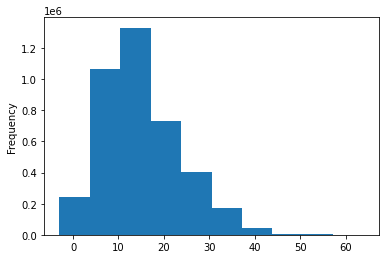

In [9]:
Train_raw['Slope'].plot(kind = 'hist')

Aspect of hill: Aspect is the orientation of slope, measured clockwise in degrees from 0 to 360, where 0 is north-facing, 90 is east-facing, 180 is south-facing, and 270 is west-facing.

<AxesSubplot:ylabel='Frequency'>

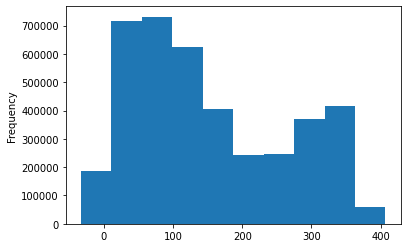

In [10]:
Train_raw['Aspect'].plot(kind ='hist')

Aspect seems to have values below 0 and above 360 as well. We should make it in the rage 0 to 360.
We achieve this by adding 360 if value is below 0 and substacting 360 if the values is greater than equal to 360 

In [11]:
#Checking what values corresponded to above 360 and below 0
Train_raw[(Train_raw['Aspect']>360) | 
          (Train_raw['Aspect']<0)].tail()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
3999913,3999913,2895,-9,9,149,171,1579,237,186,170,320,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3999921,3999921,2508,376,20,50,27,2603,156,211,247,741,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3999952,3999952,2727,367,5,122,-1,1209,218,227,19,906,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3999958,3999958,3259,362,3,697,136,1907,195,182,164,932,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3999976,3999976,3092,363,21,410,8,6460,155,237,10,1751,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2


In [12]:
x = Train_raw['Aspect'].apply(lambda x: x+360 if x<0 else x-360 if x>=360 else x)

In [13]:
# Checking if function applied correctly
print(x[3999913],x[3999921])

351 16


In [14]:
# Adding the new column to original column
Train_raw['Aspect'] =x

<AxesSubplot:ylabel='Frequency'>

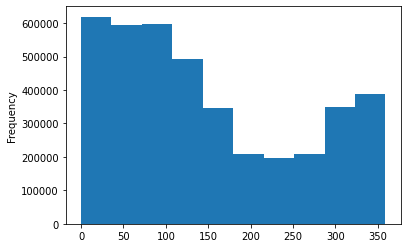

In [15]:
Train_raw['Aspect'].plot(kind='hist')

In [16]:
X_train_full = Train_raw.drop('Cover_Type',axis=1).drop('Id',axis=1)
Y_train_full = Train_raw['Cover_Type']

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train_full,Y_train_full,test_size = 0.01,random_state =10) 

In [18]:
X_test.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
313849,2782,338,41,192,109,3980,162,238,210,1219,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
552791,3323,256,15,765,-2,4049,203,212,202,1216,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3889664,2296,218,17,214,124,121,190,257,191,282,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1930397,3389,356,7,1124,40,2776,232,212,196,1432,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1451364,3029,54,16,100,113,3888,191,257,150,2102,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [19]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [20]:
parameters = {
     "eta"    : [0.05,0.15, 0.30 ] ,
     "max_depth"        : [ 3, 6, 8, 15],
     "min_child_weight" : [ 1, 4, 7 ],
     "gamma"            : [ 0.0, 0.2 ,  0.4 ],
     "colsample_bytree" : [ 0.3, 0.5 , 0.7 ]
     }

#Using GridSearchCV, memory gets occupied. So making manually

In [21]:
import xgboost as xgb

In [22]:

xgb_obj = xgb.XGBClassifier(objective='multi:softmax',eta =0.3,predictor = 'gpu_predictor',eval_metric='mlogloss',tree_method='gpu_hist', missing = None, seed=42 )
xgb_obj.fit(X_train,y_train)
yhat = xgb_obj.predict(X_test)
accuracy_score(y_test,yhat)

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.959825

In [23]:
xgb_obj = xgb.XGBClassifier(objective='multi:softmax',eta =0.05,predictor = 'gpu_predictor',eval_metric='mlogloss',tree_method='gpu_hist', missing = None, seed=42 )
xgb_obj.fit(X_train,y_train)
yhat = xgb_obj.predict(X_test)
# classification_report(y_test,yhat)
accuracy_score(y_test,yhat)

0.944475

In [24]:
xgb_obj = xgb.XGBClassifier(objective='multi:softmax',eta =0.4,predictor = 'gpu_predictor',eval_metric='mlogloss',tree_method='gpu_hist', missing = None, seed=42 )
xgb_obj.fit(X_train,y_train)
yhat = xgb_obj.predict(X_test)
# classification_report(y_test,yhat)
accuracy_score(y_test,yhat)

0.960125

In [25]:
xgb_obj = xgb.XGBClassifier(objective='multi:softmax',eta =0.5,predictor = 'gpu_predictor',eval_metric='mlogloss',tree_method='gpu_hist', missing = None, seed=42 )
xgb_obj.fit(X_train,y_train)
yhat = xgb_obj.predict(X_test)
# classification_report(y_test,yhat)
accuracy_score(y_test,yhat)

0.9611

In [26]:
xgb_obj = xgb.XGBClassifier(objective='multi:softmax',eta =0.6,predictor = 'gpu_predictor',eval_metric='mlogloss',tree_method='gpu_hist', missing = None, seed=42 )
xgb_obj.fit(X_train,y_train)
yhat = xgb_obj.predict(X_test)
# classification_report(y_test,yhat)
accuracy_score(y_test,yhat)

0.960925

eta 0.5 doesn't need to be explored further

In [27]:
xgb_obj = xgb.XGBClassifier(objective='multi:softmax',max_depth=6,eta =0.5,predictor = 'gpu_predictor',eval_metric='mlogloss',tree_method='gpu_hist', missing = None, seed=42 )
xgb_obj.fit(X_train,y_train)
yhat = xgb_obj.predict(X_test)
# classification_report(y_test,yhat)
accuracy_score(y_test,yhat)

0.9611

In [28]:
xgb_obj = xgb.XGBClassifier(objective='multi:softmax',max_depth=2,eta =0.5,predictor = 'gpu_predictor',eval_metric='mlogloss',tree_method='gpu_hist', missing = None, seed=42 )
xgb_obj.fit(X_train,y_train)
yhat = xgb_obj.predict(X_test)
# classification_report(y_test,yhat)
accuracy_score(y_test,yhat)

0.94215

decreasing max_depth did not improve, so we will keep it at 6

In [66]:
xgb_obj = xgb.XGBClassifier(objective='multi:softmax',max_depth=15,eta =0.5,predictor = 'gpu_predictor',eval_metric='mlogloss',tree_method='gpu_hist', missing = None, seed=42 )
xgb_obj.fit(X_train,y_train)
yhat = xgb_obj.predict(X_test)
# classification_report(y_test,yhat)
accuracy_score(y_test,yhat)

0.960825

Let us keep max_depth to 6 as increasing it did not improve result

In [29]:
xgb_obj = xgb.XGBClassifier(objective='multi:softmax',min_child_weight = 0,max_depth=6,eta =0.5,predictor = 'gpu_predictor',eval_metric='mlogloss',tree_method='gpu_hist', missing = None, seed=42 )
xgb_obj.fit(X_train,y_train)
yhat = xgb_obj.predict(X_test)
# classification_report(y_test,yhat)
accuracy_score(y_test,yhat)

0.96075

0.96075 is not improvement over 0.9611. So we will discard the recent changes. We will now explore tuning gamma

In [30]:
xgb_obj = xgb.XGBClassifier(objective='multi:softmax',gamma =0.2 ,max_depth=6,eta =0.5,predictor = 'gpu_predictor',eval_metric='mlogloss',tree_method='gpu_hist', missing = None, seed=42 )
xgb_obj.fit(X_train,y_train)
yhat = xgb_obj.predict(X_test)
# classification_report(y_test,yhat)
accuracy_score(y_test,yhat)

0.9608

tuning gamma is not helpful, default value is better as 0 gain allowed default fits the data better. We will tune samples to be used for building trees

In [31]:
xgb_obj = xgb.XGBClassifier(objective='multi:softmax',colsample_bytree = 0.7,max_depth=6,eta =0.5,predictor = 'gpu_predictor',eval_metric='mlogloss',tree_method='gpu_hist', missing = None, seed=42 )
xgb_obj.fit(X_train,y_train)
yhat = xgb_obj.predict(X_test)
# classification_report(y_test,yhat)
accuracy_score(y_test,yhat)

0.96095

In [32]:
xgb_obj = xgb.XGBClassifier(objective='multi:softmax',colsample_bytree = 0.3,max_depth=6,eta =0.5,predictor = 'gpu_predictor',eval_metric='mlogloss',tree_method='gpu_hist', missing = None, seed=42 )
xgb_obj.fit(X_train,y_train)
yhat = xgb_obj.predict(X_test)
# classification_report(y_test,yhat)
accuracy_score(y_test,yhat)

0.957225

tuning columns for tree did not improve result, so we will keep the default values

Make regularization of 0.5

In [33]:
xgb_obj = xgb.XGBClassifier(objective='merror',reg_lambda=1 ,max_depth=6,eta =0.5,predictor = 'gpu_predictor',eval_metric='merror',tree_method='gpu_hist', missing = None, seed=42 )
xgb_obj.fit(X_train,y_train)
yhat = xgb_obj.predict(X_test)
# classification_report(y_test,yhat)
accuracy_score(y_test,yhat)

0.9611

In [35]:
xgb_obj = xgb.XGBClassifier(objective='merror',reg_lambda=0.1 ,max_depth=6,eta =0.5,predictor = 'gpu_predictor',eval_metric='merror',tree_method='gpu_hist', missing = None, seed=42 )
xgb_obj.fit(X_train,y_train)
yhat = xgb_obj.predict(X_test)
# classification_report(y_test,yhat)
accuracy_score(y_test,yhat)

0.961325

In [36]:
xgb_obj = xgb.XGBClassifier(objective='merror',reg_lambda=0.5 ,max_depth=6,eta =0.5,predictor = 'gpu_predictor',eval_metric='merror',tree_method='gpu_hist', missing = None, seed=42 )
xgb_obj.fit(X_train,y_train)
yhat = xgb_obj.predict(X_test)
# classification_report(y_test,yhat)
accuracy_score(y_test,yhat)

0.96075

Regularization of 0.1 improved the results. Keeping this, we will make the final submit

In [37]:
#Modelling for submission
xgb_obj = xgb.XGBClassifier(objective='merror',reg_lambda=0.1 ,max_depth=6,eta =0.5,predictor = 'gpu_predictor',eval_metric='merror',tree_method='gpu_hist', missing = None, seed=42)
xgb_obj.fit(X_train_full,Y_train_full)
yhat = xgb_obj.predict(Test_raw.drop('Id',axis=1))


In [38]:
data = {
  "Id": Test_raw.Id,
  "Cover_Type": yhat
}
sub = pd.DataFrame(data)

In [39]:
sub.reset_index(drop=True, inplace=True)
sub.head()

,Id,Cover_Type
0,4000000,2
1,4000001,2
2,4000002,2
3,4000003,2
4,4000004,2


In [40]:
sub.to_csv('sub_tab_play.csv')

Giving a test accuracy of 0.953922